In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ujipenchars2
import string
import random
import itertools
from drawing import Drawing
from preprocessing import DrawingScaler, resample_drawing
from dtw import dtw, dtw_distance_matrix

np.random.seed(0)

In [2]:
train, test = ujipenchars2.Parser('data/ujipenchars2').parse(string.digits)

drawing_scaler = DrawingScaler()
train = drawing_scaler.fit_transform(train)
test = drawing_scaler.transform(test)

data = train + test
is_train = np.array([True]*len(train) + [False]*len(test))
labels = np.array([int(drawing.label) for drawing in data], dtype=np.int8)

In [3]:
len(train), len(test)

(800, 400)

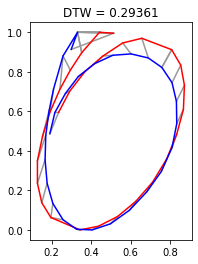

In [4]:
def plot_drawing(drawing: Drawing):
    plt.title(drawing.label)
    for stroke in drawing.strokes:
        plt.plot(stroke[:,0], stroke[:,1], color='black', linewidth=1, solid_capstyle='round')
    plt.axis('scaled')

def plot_dtw(drawing1: Drawing, drawing2: Drawing):
    stroke1 = np.vstack(drawing1.strokes)
    stroke2 = np.vstack(drawing2.strokes)
    distance, matching = dtw(stroke1, stroke2)
    plt.title(f'DTW = {distance:.5g}')
    for i in matching:
        plt.plot([stroke1[i[0], 0], stroke2[i[1], 0]], [stroke1[i[0], 1], stroke2[i[1], 1]], color='0.6')
    for stroke in drawing1.strokes:
        plt.plot(stroke[:,0], stroke[:,1], color='red', solid_capstyle='round')
    for stroke in drawing2.strokes:
        plt.plot(stroke[:,0], stroke[:,1], color='blue', solid_capstyle='round')
    plt.axis('scaled')
    plt.show()
    
plot_dtw(data[0], data[1])

In [10]:
# Resampling s 50 točaka
resampled_data = [resample_drawing(drawing, 50) for drawing in data]

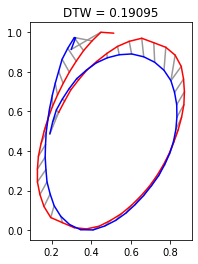

In [11]:
plot_dtw(resampled_data[0], resampled_data[1])

In [8]:
# Matrica s DTW udaljenostima
D = dtw_distance_matrix(np.array([np.vstack(drawing.strokes) for drawing in resampled_data], dtype=np.float32))